# CATS VS DOGS CLASSIFIER
-------------------

### Let's import the modules

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras as kr
from PIL import Image

# Retrieving data

dataset link: https://www.kaggle.com/tongpython/cat-and-dog

In [114]:
# as our data is in the form of images we create a function which gets all the images and create it in the form of numpy arrays
import os
def make_dataset(file,x):        # if x is 0- training images are fetched and if 1- test images are fetched
    ls=[]
    if x==0:
        folder=r"C:\Users\bhavy\OneDrive\Documents\catsvsdogs_train\{}".format(file)
    elif x==1:
        folder=r"C:\Users\bhavy\OneDrive\Documents\catsvsdogs_test\{}".format(file)
    files=os.listdir(folder)    # lists all the elements in the given path
    files=list(map(lambda x: os.path.join(folder,x),files))   # joins path and image name
    a=(len(files))
    for i in range(a):
        img=Image.open(files[i])
        img=img.resize((64,64))
        img=np.array(img)
        ls.append(img)
        
    return ls

In [1]:
import os
def md(file,x):
    ls=[]
    folder
    file=os.listdir(folder)
    files==list(map(lambda x:os.path.join(folder,x),files))
    a=(len(files))

In [115]:
# Creating the training datasets
cat_train_data=make_dataset('training_set\cats',0)
dog_train_data=make_dataset('training_set\dogs',0)

In [116]:
# Creating the test datasets
cat_test_data=make_dataset('test_set\cats',1)
dog_test_data=make_dataset('test_set\dogs',1)

# Analyzing our datasets

In [117]:
# finding lengths of our datasets
len(cat_train_data)

4000

In [118]:
len(dog_train_data)

4005

In [119]:
len(cat_test_data)

1011

In [120]:
len(dog_test_data)

1012

In [121]:
# checking shape of single image
dog_train_data[0].shape

(64, 64, 3)

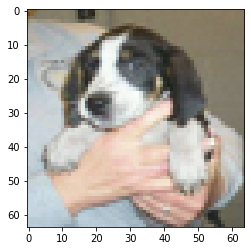

In [122]:
# here is a demo of an image
plt.imshow(dog_train_data[1])

In [123]:
# combining images of cats and dogs in single training and testing datasets
train_data=cat_train_data+dog_train_data
len(train_data)

8005

In [124]:
test_data=cat_test_data+dog_test_data
len(test_data)

2023

In [125]:
# Converting them into np arrays
train_data=np.array(train_data,dtype=float)
test_data=np.array(test_data,dtype=float)

In [126]:
# now creating labels i.e target for each dataset
label_train=np.zeros(train_data.shape[0])
label_test=np.zeros(test_data.shape[0])

In [127]:
len(label_train)

8005

In [128]:
len(label_test)

2023

In [129]:
# labelling the dog images as 1
label_train[4000:]=1
label_test[1011:]=1

In [130]:
label_train[5520]

1.0

In [131]:
train_data.shape

(8005, 64, 64, 3)

In [132]:
# now we need to randomize our test and train datasets

In [133]:
# randomizing train data
a=train_data.shape[0]
i=np.random.permutation(a)
train_x,train_y=train_data[i],label_train[i]
print(train_y.shape,train_x.shape)

(8005,) (8005, 64, 64, 3)


In [134]:
# randomizing test data
a=test_data.shape[0]
i=np.random.permutation(a)
test_x,test_y=test_data[i],label_test[i]
print(test_y.shape,test_x.shape)

(2023,) (2023, 64, 64, 3)


In [135]:
num_classes=2   # num classes contains the number of outputs
ytrain=kr.utils.to_categorical(train_y,num_classes)
ytest=kr.utils.to_categorical(test_y,num_classes)

## CREATING A CNN MODEL

In [136]:
# importing layers from keras for our neural network
from keras.layers import  Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [137]:
cnn_model=kr.models.Sequential()    # creating neural network

# Convolution Layer
cnn_model.add(Conv2D(32,(3,3), input_shape=(64,64,3) ,activation='relu'))
# Pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# Adding a second Convolution Layer
cnn_model.add(Conv2D(32,(3,3) ,activation='relu'))
# Adding another Pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# Flattening
cnn_model.add(Flatten())
# Adding Dense layers
cnn_model.add(Dense(units=128,activation='relu'))
cnn_model.add(Dense(units=num_classes,activation='sigmoid'))


In [138]:
# Compiling our model
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [139]:
# Training our model with the training images
batch_size=32
epochs=16
cnn_model.fit(train_x,ytrain,epochs=epochs,batch_size=batch_size
              ,validation_data=(test_x,ytest),shuffle=True)


Train on 8005 samples, validate on 2023 samples
Epoch 1/16
8005/8005 [==============================] - 27s 3ms/step - loss: 2.5945 - accuracy: 0.5503 - val_loss: 0.6786 - val_accuracy: 0.5685
Epoch 2/16
8005/8005 [==============================] - 26s 3ms/step - loss: 0.6407 - accuracy: 0.6270 - val_loss: 0.6724 - val_accuracy: 0.5917
Epoch 3/16
8005/8005 [==============================] - 27s 3ms/step - loss: 0.5627 - accuracy: 0.6974 - val_loss: 0.7002 - val_accuracy: 0.6063
Epoch 4/16
8005/8005 [==============================] - 26s 3ms/step - loss: 0.4443 - accuracy: 0.7794 - val_loss: 0.7454 - val_accuracy: 0.6172
Epoch 5/16
8005/8005 [==============================] - 25s 3ms/step - loss: 0.3296 - accuracy: 0.8518 - val_loss: 0.8992 - val_accuracy: 0.6263
Epoch 6/16
8005/8005 [==============================] - 25s 3ms/step - loss: 0.2349 - accuracy: 0.8977 - val_loss: 1.0188 - val_accuracy: 0.6248
Epoch 7/16
8005/8005 [==============================] - 25s 3ms/step - loss: 0.14

In [140]:
# checking the models performance for test  data
score=cnn_model.evaluate(test_x,ytest,verbose=1)
print(score)

2023/2023 [==============================] - 2s 820us/step
[2.563394788595573, 0.6181413531303406]


# Predicting values

In [141]:
# predicting values for test dataset
pred_values=cnn_model.predict(test_x)
pred_values[:5]

array([[1.3274819e-02, 9.8290431e-01],
       [9.5070779e-01, 3.7796617e-02],
       [9.9973154e-01, 1.0082126e-04],
       [1.1782646e-03, 9.9775362e-01],
       [1.1026859e-06, 9.9999976e-01]], dtype=float32)

In [142]:
# Converting output into integer values
pred=[]
for i in range(len(pred_values)):
    pred.append(np.where(pred_values[i]==np.amax(pred_values[i]))[0][0])  # GETS THE PREDICTED VALUE FROM PRED_VALUES ARRAY
pred=np.array(pred)

In [143]:
# Finding how many values have been predicted correctly
np.unique(pred==test_y,return_counts=True)

(array([False,  True]), array([ 767, 1256], dtype=int64))